<a href="https://colab.research.google.com/github/padjadj/premier_repo/blob/main/Projet_Patrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Je vais tout  d'abord analyser les données : 
- caractéristiques
- types
- quantités
etc...

Rapide description des données :
Il y a 5110 lignes, et 12 colonnes.

5110 individus, et 12 caractéristiques qui sont les suivantes :

id = identifiant de la personne

gender = sexe, homme ou femme

age = âge de la personne

hypertension = antécédent d'hypertension, 1 pour oui, 0 pour non.

heart_disease = antécédent de maladie cardiaque, 1 pour oui, 0 pour non.

ever_married = la personne a été mariée, 1 pour oui, 0 pour non.

work_type = type de travail.

Residence_type = type de lieu de vie.

avg_glucose_level = niveau moyen de glucose.

bmi = indice de masse corporelle.

smoking status = personne fumeur.

stroke = variable cible, la personne a-t-elle déjà eu une attaque.



In [ ]:
# J'importe le fichier et j'en affiche les premières lignes.
import pandas as pd
df=pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/strokes.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()
# Ce tableau nous permet de voir qu'il y a 7 caractéristiques décrites par des valeurs numériques, et 5 par des modalités.
# On peut voir aussi que la colonne bmi n'est pas renseignée pour tous les individus (4909 sur 5110), il y a donc des valeurs manquantes,
# en locurrence, 201.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Confirmation des valeurs manquantes : 
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Je vais regarder les différentes modalités des variables catégorielles, c'est à dire celles qui ont un nombre fini de modalités.
df['ever_married'].value_counts()

# On voit 2 modalités : yes ou No

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['Residence_type'].value_counts()
# On voit 2 modalités : Urban ou Rural

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['gender'].value_counts()
# On voit 3 modalités, Female, Male et Other pour 1 personne.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['work_type'].value_counts()
# On voit 5 modalités, secteur privé, indépendants, mère ou père au foyer, fonctionnaires, aucune activité.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()
# On voit 4 modalités : jamais fumé, NSP, ancien fumeur, fumeur.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# Je vérifie aussi s'il n'y a pas de doublons.
df.duplicated().sum()
# Aucun doublon.

0

Avant d'aller plus loin, je vais nettoyer les quelques données
qui ne vont pas, c'est à dire :

1) Remplacer les valeurs manquantes pour la variable bmi.

2) Corriger dans gender l'échantillon pour lequel on a en valeur 1.
Je décide de la corriger par Female, modalité la plus fréquente.


In [ ]:
# Je remplace les valeurs manquantes de bmi par la moyenne de cette variable :
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

df.isna().sum()
# Plus aucune valeur manquante

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Enfin, je décide d'enlever la 1ère colonne id qui ne sert à rien.
df = df.drop('id', axis=1)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# Pour la variable gender, je remplace Other par Female : 
df = df.replace('Other', 'Female')


df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


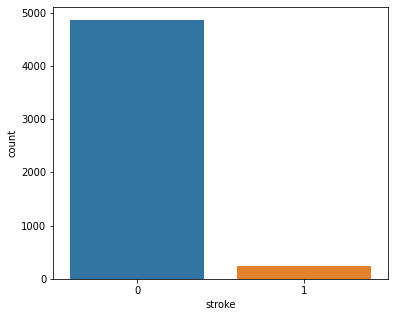

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(df['stroke'])
plt.show()
pd.crosstab(df.stroke, df.gender, normalize=1)
df['stroke'].value_counts(normalize=True)
# On voit que la variable cible éagale à 1 représente même pas 5% du total de la population.
# Ce qui est très faible pur l'analyse. 



<Figure size 432x288 with 0 Axes>

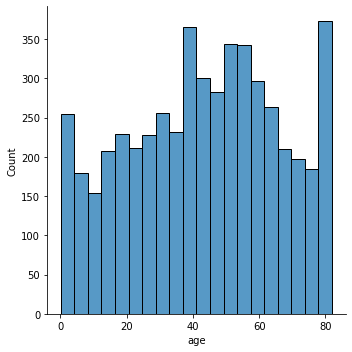

<Figure size 432x288 with 0 Axes>

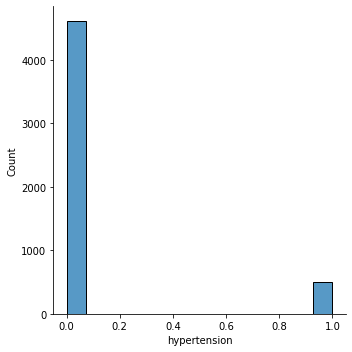

<Figure size 432x288 with 0 Axes>

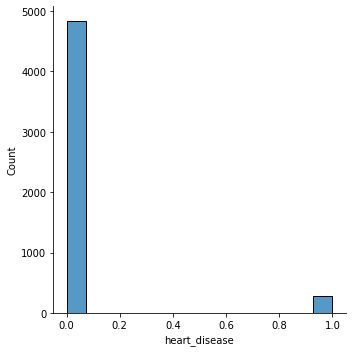

<Figure size 432x288 with 0 Axes>

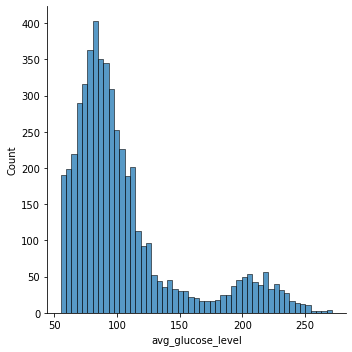

<Figure size 432x288 with 0 Axes>

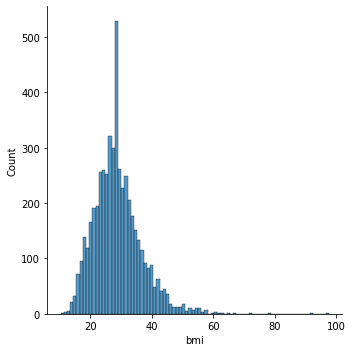

<Figure size 432x288 with 0 Axes>

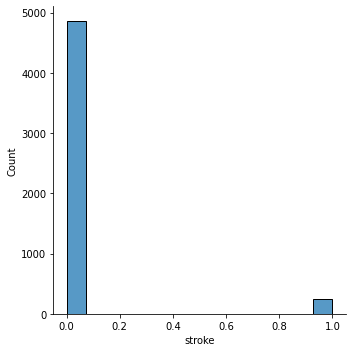

In [ ]:
# Si on compare les histogrammes des variables à modalité binaire entre elles, on remarque qu'ils se ressemblent beaucoup,
# voire qu'ils sont identiques.
# On peut donc penser facilement que les individus qui ont de l'hypertension et des maladies cardiaques, ont eu pratiquement
# tous une attaque cardiaque.
# Est-ce pertinent de garder ces variables ?
# On voit que la distribution de l'âge est équilibré, bizarre pour étudier des maladies cardiaques qui 
# interviennent normalement avec l'âge avançant.
# Environ 1000 individus ont moins de 20 ans.
for col in df.select_dtypes(include=['int64', 'float']):
  plt.figure()
  sns.displot(df[col])


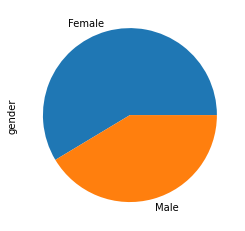

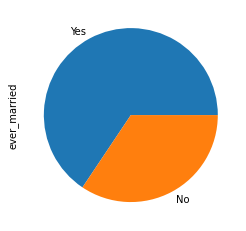

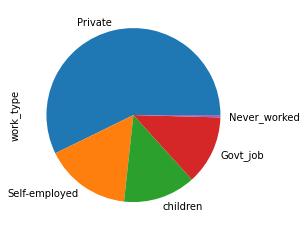

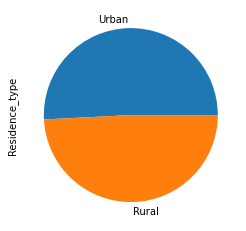

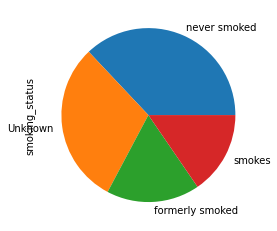

In [ ]:
# On regarde les variables qualitatives. 
# Une majorité de femmes.
# L'habitat est à 50% rural, 50% urbaine.
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

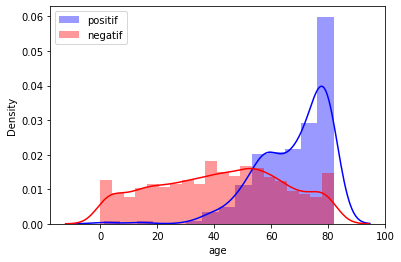

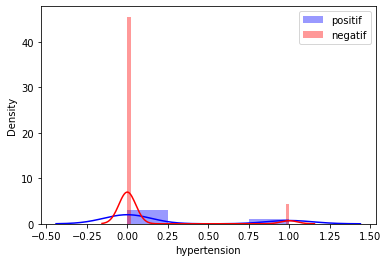

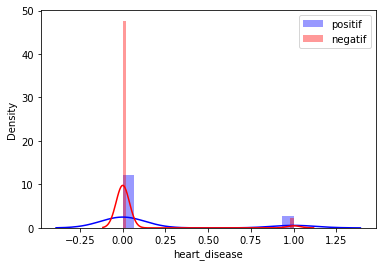

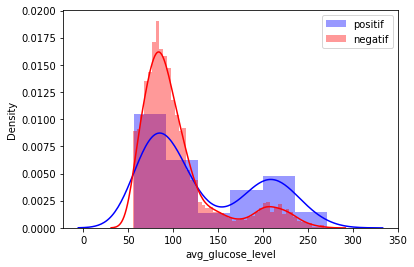

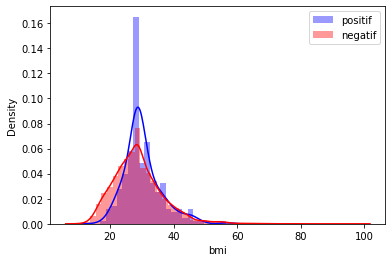

In [ ]:
# On va regarder la relation entre notre variable cible, et les autres variables.
positif_df=df[df['stroke']==1]
negatif_df=df[df['stroke']==0]
data=df.drop('stroke', axis=1)
for col in data.select_dtypes(include=['int64', 'float']):
  plt.figure()
  sns.distplot(positif_df[col], label='positif', color='blue')
  sns.distplot(negatif_df[col], label='negatif', color='red')
  plt.legend()
# Forte concentration autour de 0 pour l'hypertension et heart desease.
# Au niveau de l'âge, les 2 courbes se croisent aux environs de 50 ans.
 

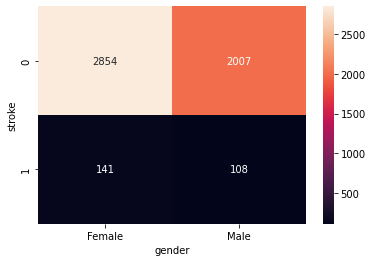

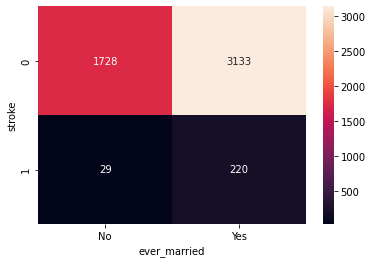

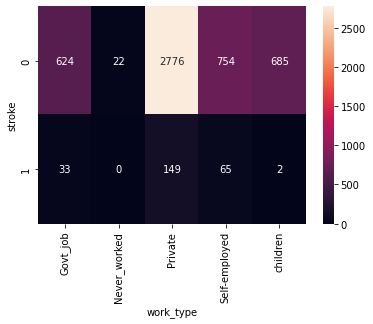

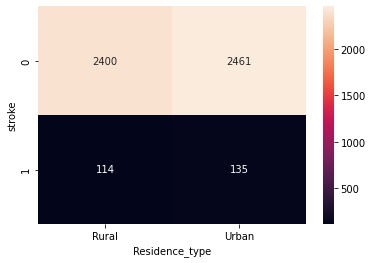

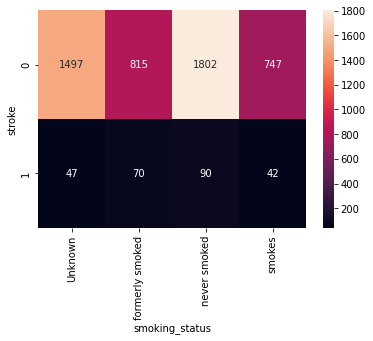

In [ ]:
# Analyse des données qualitatives
for col in data.select_dtypes('object'):
  plt.figure()
  sns.heatmap(pd.crosstab(df['stroke'], df[col]), annot=True, fmt='d')
# On peut voir que sur la variable ever_married, proportionnellement plus de malades, 7% de stroke positif pour ever_married, 
# versus 1,6% pour les no ever_married.

In [ ]:
# On va regarder la corrélation entre les variables, on affiche la matrice de corrélation.

from scipy.stats import pearsonr
num_data=df.select_dtypes(include=['int64', 'float'])
num_data.corr()
# On peut voir que l'indice de Pearson le plus élevé est entre les variables bmi et age.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [ ]:
# On passe à la modélisation.
# Nous sommes dans un modèle d'apprentissage supervisé, avec une variable cible, stroke.
# Cette variable est qualitative, binaire 0 ou 1. Nous sommes sur un modèle de classification.
# On sépare en 2 dataframe, les variables explicatives et la variable cible.
data=df.drop('stroke', axis=1)
cible=df['stroke']



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [ ]:
# On affiche les coefficients obtenus

coeff=logreg.coef_

# On affiche la constante

intercept=logreg.intercept_

# On calcule les odd-ratios

# On importe la librairie numpy

import numpy as np 

# On calcule les odd ratios

odd_ratios=np.exp(logreg.coef_)

# On crée un dataframe qui combine à la fois variables, coefficients et odd-ratios

resultats=pd.DataFrame(data.columns, columns=["Variables"])

resultats['Coefficients']=logreg.coef_.tolist()[0]

resultats['Odd_Ratios']=odd_ratios.tolist()[0]


resultats


,Variables,Coefficients,Odd_Ratios
0,age,1.682631,5.379690
1,hypertension,0.113775,1.120500
2,heart_disease,0.036192,1.036855
3,avg_glucose_level,0.167983,1.182917
4,bmi,0.009011,1.009051
5,gender_Female,-0.021316,0.978910
6,gender_Male,0.021316,1.021545
7,ever_married_No,0.078323,1.081472
8,ever_married_Yes,-0.078323,0.924666
9,work_type_Govt_job,0.016446,1.016582


In [ ]:
# Il est nécessaire d'encoder les variables catégorielles, c'est à dire transformer les différentes modalités par 0 ou 1.
data=pd.get_dummies(data)
data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   ever_married_No                 5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Govt_job              5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [ ]:
# On sépare data en 2 sous-ensembles, train et test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data, cible, test_size=0.3, stratify=cible)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# On normalise les données, c'est à dire qu'on enlève les valeurs aberrantes.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)


(3577, 20) (1533, 20) (3577,) (1533,)


In [ ]:
# Je vais instancier plusieurs modèles afin de les comparer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logreg=LogisticRegression(solver='newton-cg')
decision_tree=DecisionTreeClassifier()
svc=SVC()
kneighbors=KNeighborsClassifier()

# On entraîne les modèles
logreg.fit(X_train_norm, y_train)
decision_tree.fit(X_train_norm, y_train)
svc.fit(X_train_norm, y_train)
kneighbors.fit(X_train_norm, y_train)

# Prédiction
y_pred=logreg.predict(X_test_norm)

# Je calcule le score des différents modèles
score_logreg=logreg.score(X_test_norm, y_test)
score_decision_tree=decision_tree.score(X_test_norm, y_test)
score_svc=svc.score(X_test_norm, y_test)
score_kneighbors=kneighbors.score(X_test_norm, y_test)

print('score_logreg = ', score_logreg)
print('score_decision_tree = ', score_decision_tree)
print('score_svc = ', score_svc)
print('score_Kneighbors = ', score_kneighbors)

# On trouve un score de 95,5% en logreg. J'ai modifié la taille de la base de test, en la passant de 20% à 30%, on gagne 1 point.



score_logreg =  0.9510763209393346
score_decision_tree =  0.9093281148075668
score_svc =  0.9510763209393346
score_Kneighbors =  0.949119373776908


In [ ]:
# Je vais évaluer les modèles avec la cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

performances=cross_val_score(logreg, data, cible, cv=5, scoring='accuracy')

print('Performance obtenue sur chaque split : ', performances)
# Sur les différents splits, l'accuracy est la même

# On va utiliser Stratified k_fold
from sklearn.model_selection import StratifiedKFold
folds_1 = StratifiedKFold(n_splits=5, shuffle=False)
folds_2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

performances_non_shuffled=cross_val_score(logreg, data, cible, cv=folds_1, scoring='accuracy')
performances_shuffled=cross_val_score(logreg, data, cible, cv=folds_2, scoring='accuracy')

print('Performances obtenues sur chacun des splits avec découpage successif des folds sans mélange',performances_non_shuffled )
print('Performances obtenues sur chacun des splits avec découpage successif des folds avec mélange',performances_shuffled )

Performance obtenue sur chaque split :  [0.95107632 0.95107632 0.95107632 0.95107632 0.95303327]
Performances obtenues sur chacun des splits avec découpage successif des folds sans mélange [0.95107632 0.95107632 0.95107632 0.95107632 0.95303327]
Performances obtenues sur chacun des splits avec découpage successif des folds avec mélange [0.95107632 0.95009785 0.95107632 0.95205479 0.95205479]
